In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import kurtosis, skew

# Problem 1: Acquiring a dataset
data = pd.read_csv("train.csv")


In [21]:
# Problem 2: Examining the dataset
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
# Problem 3: Checking the data
print("Columns in dataset:", data.columns)
target_variable = "SalePrice"
print("Target Variable:", target_variable)

Columns in dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gara


Statistical Summary:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.0

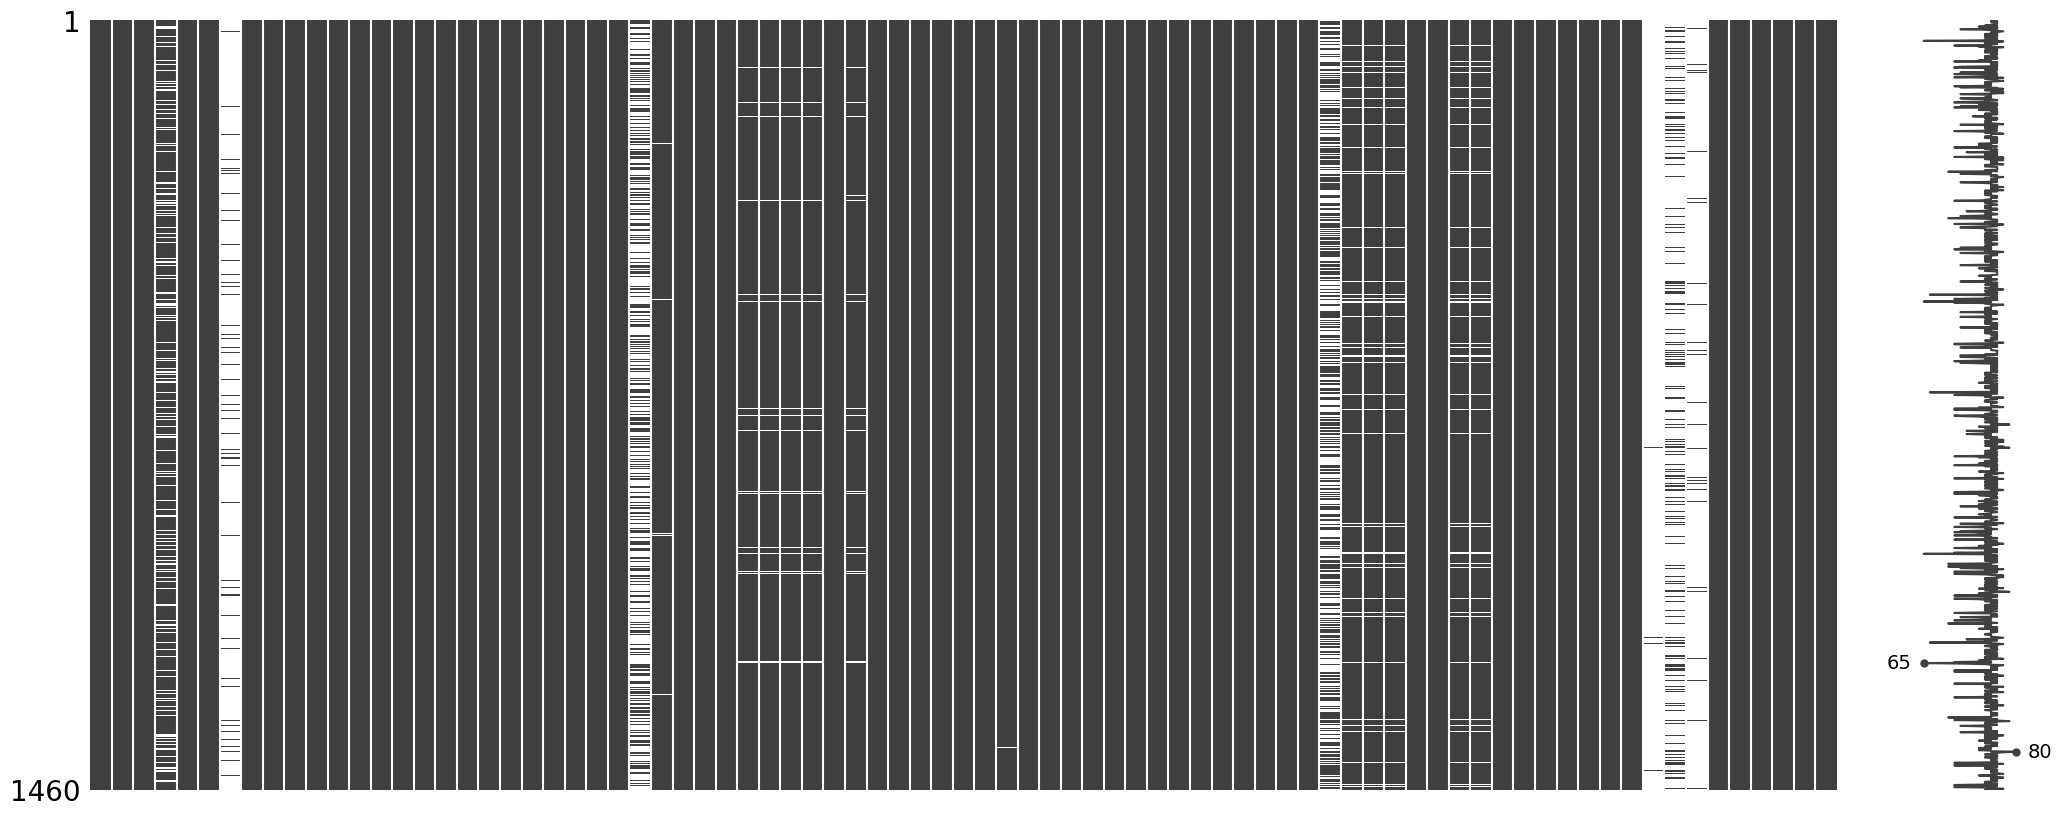

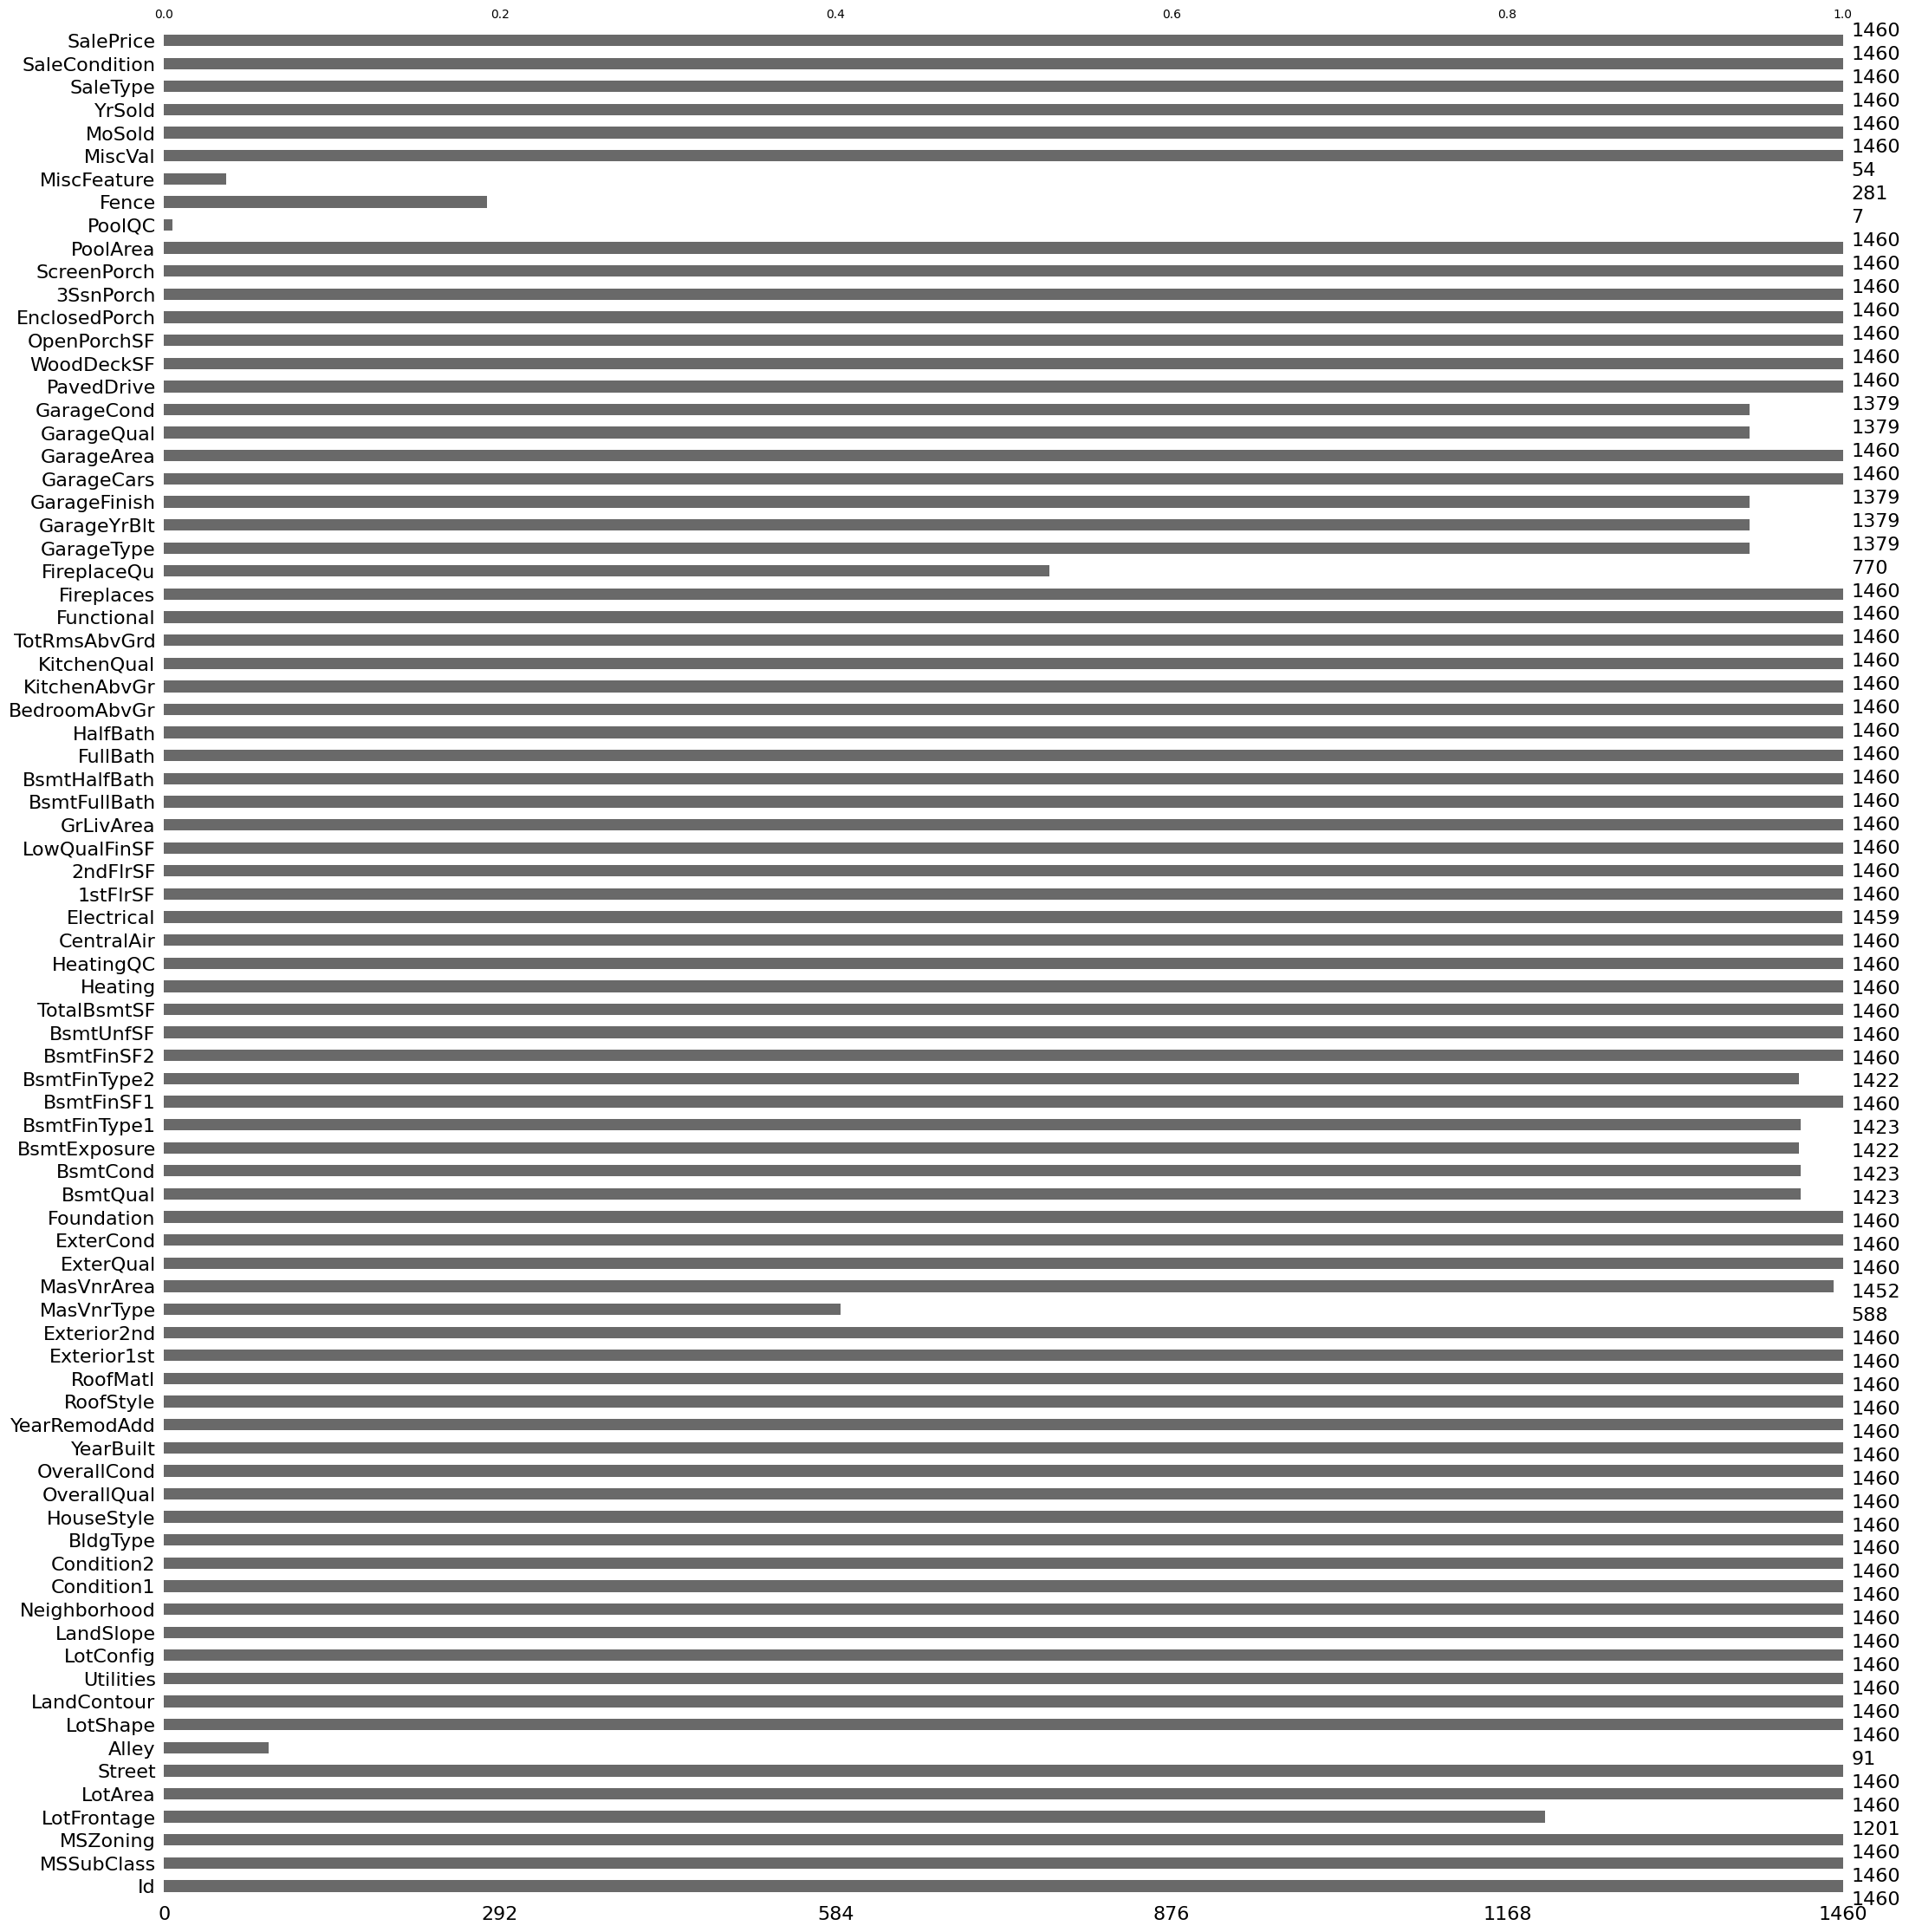

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [23]:
# Problem 3: Checking the data
print("\nStatistical Summary:")
print(df.describe())

# Checking missing values with missingno
msno.matrix(df)
plt.show()
msno.bar(df)
plt.show()

# Display summary statistics
data.describe(include='all')

              Total  Missing Ratio
LotFrontage     259      17.739726
Alley          1369      93.767123
MasVnrType      872      59.726027
MasVnrArea        8       0.547945
BsmtQual         37       2.534247
BsmtCond         37       2.534247
BsmtExposure     38       2.602740
BsmtFinType1     37       2.534247
BsmtFinType2     38       2.602740
Electrical        1       0.068493
FireplaceQu     690      47.260274
GarageType       81       5.547945
GarageYrBlt      81       5.547945
GarageFinish     81       5.547945
GarageQual       81       5.547945
GarageCond       81       5.547945
PoolQC         1453      99.520548
Fence          1179      80.753425
MiscFeature    1406      96.301370


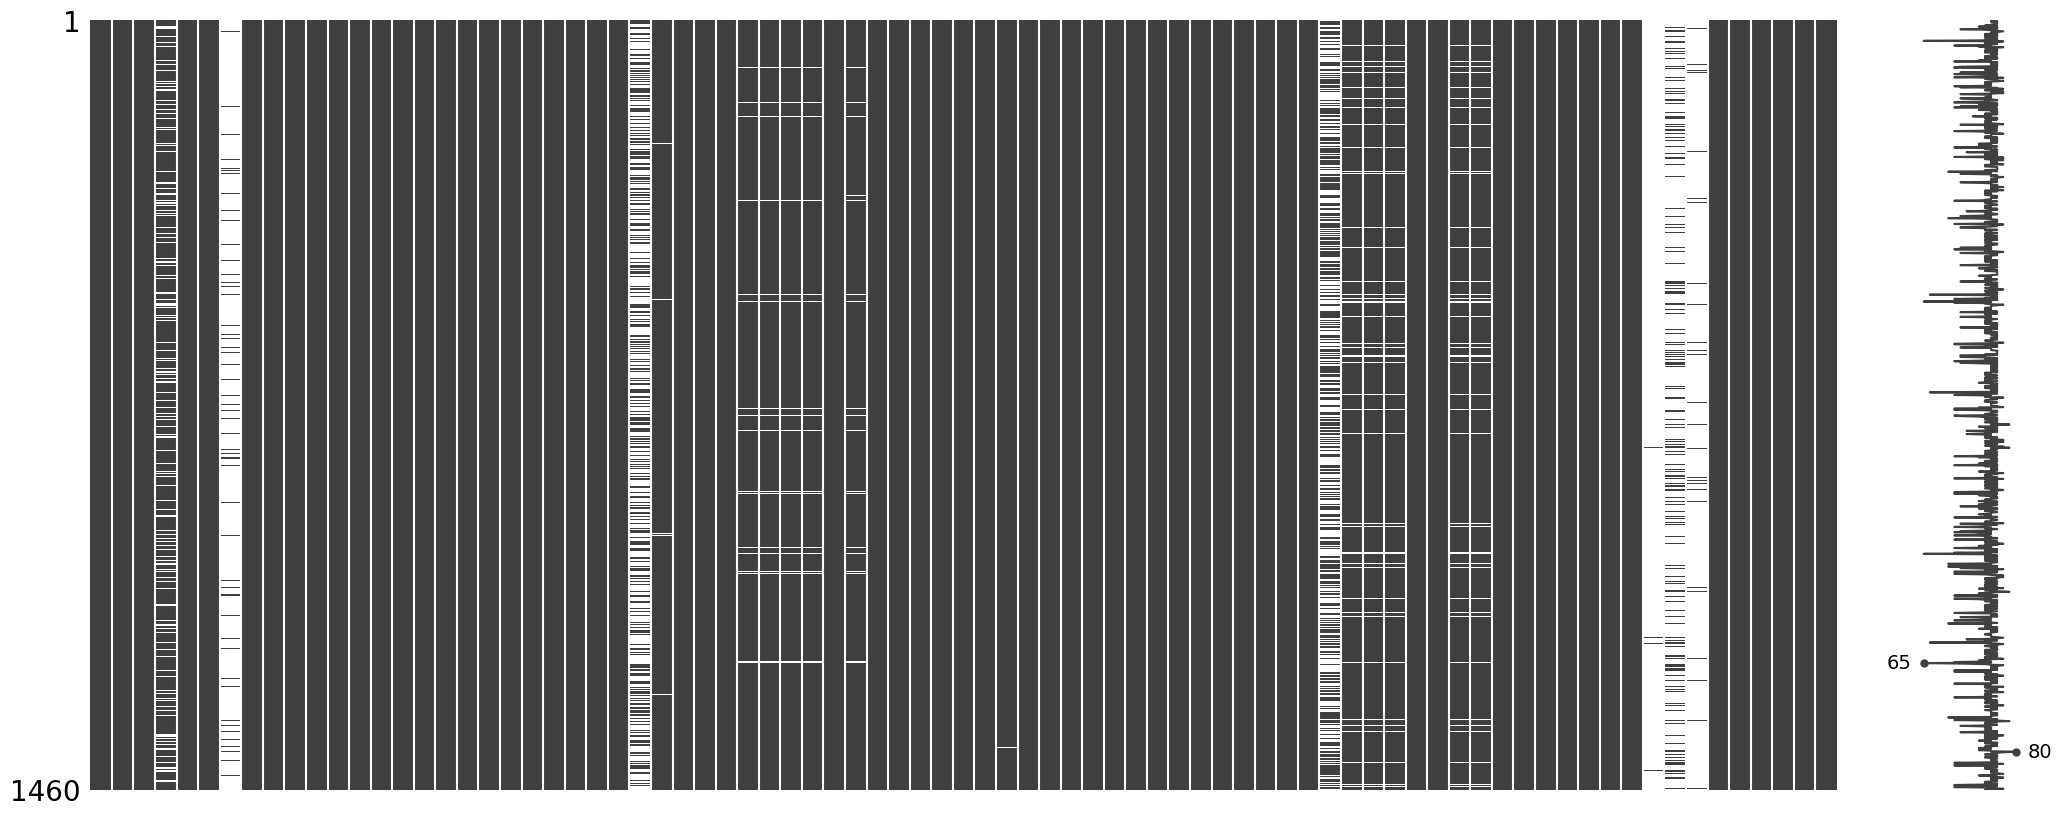

In [29]:
# Problem 4: Dealing with missing values
missing_values = data.isnull().sum()
missing_ratio = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Total': missing_values, 'Missing Ratio': missing_ratio})
print(missing_data[missing_data['Total'] > 0])

# Visualizing missing data
msno.matrix(data)
plt.show()

# Removing features with 5 or more missing values
data_cleaned = data.dropna(thresh=len(data) * 0.95, axis=1)

# Converting categorical features to numerical
data_cleaned = pd.get_dummies(data_cleaned)

# Dropping rows with any remaining missing values
data_cleaned = data_cleaned.dropna()

In [30]:
# Problem 5: Terminology research
# Kurtosis measures the peakedness or flatness of the distribution.
# Skewness measures the asymmetry of the distribution.

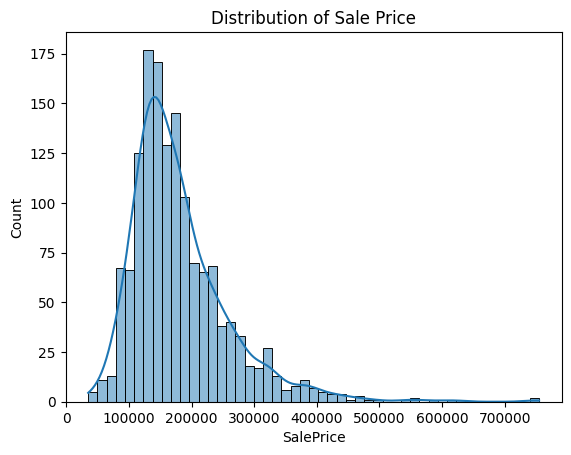

Kurtosis: 6.509812011089439
Skewness: 1.880940746034036


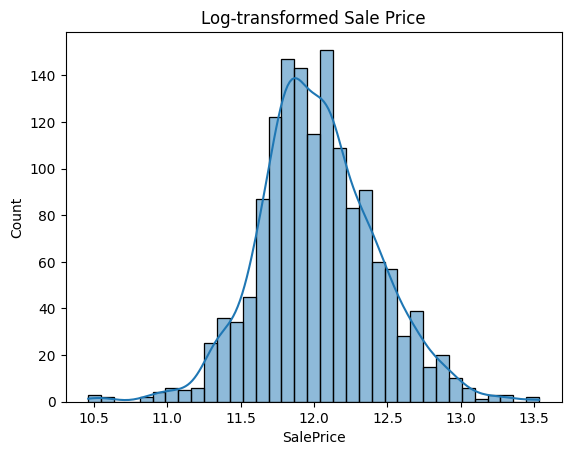

Kurtosis after log: 0.8026427107468055
Skewness after log: 0.12122191311528363


In [31]:
# Problem 6: Checking the distribution
sns.histplot(data[target_variable], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

print("Kurtosis:", kurtosis(data[target_variable]))
print("Skewness:", skew(data[target_variable]))

# Log Transformation
log_sale_price = np.log1p(data[target_variable])
sns.histplot(log_sale_price, kde=True)
plt.title("Log-transformed Sale Price")
plt.show()

print("Kurtosis after log:", kurtosis(log_sale_price))
print("Skewness after log:", skew(log_sale_price))


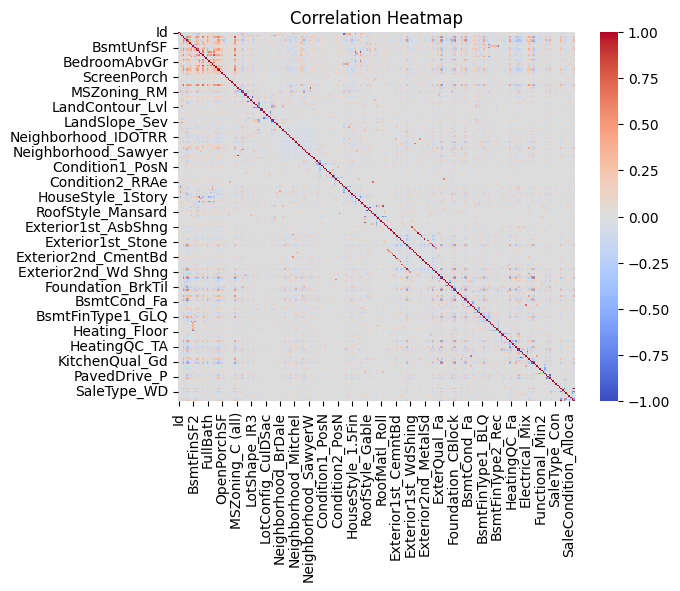

Top 10 Correlated Features: OverallQual     0.789997
GrLivArea       0.710080
GarageCars      0.639686
GarageArea      0.622492
TotalBsmtSF     0.612971
1stFlrSF        0.606849
ExterQual_TA    0.589543
FullBath        0.562491
BsmtQual_Ex     0.550160
TotRmsAbvGrd    0.536311
Name: SalePrice, dtype: float64


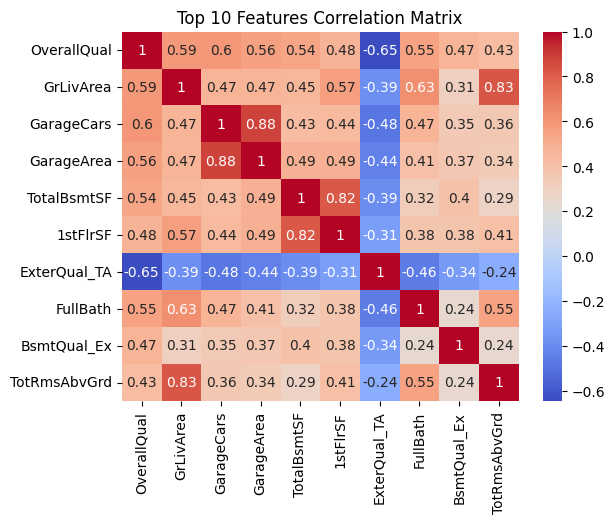

Top 3 Correlated Feature Pairs: 
 GarageCars    GarageArea    0.882332
GarageArea    GarageCars    0.882332
TotRmsAbvGrd  GrLivArea     0.825476
dtype: float64


In [41]:
# Problem 7: Checking correlation coefficients
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Selecting top 10 features correlated with SalePrice
top_features = corr_matrix[target_variable].abs().sort_values(ascending=False)[1:11]
print("Top 10 Correlated Features:", top_features)

# Heatmap of selected features
sns.heatmap(data_cleaned[top_features.index].corr(), cmap='coolwarm', annot=True)
plt.title("Top 10 Features Correlation Matrix")
plt.show()

# Finding high correlations among the top 10 features
top_corr_matrix = data_cleaned[top_features.index].corr()

# Identifying feature pairs with high correlation
high_corr_pairs = top_corr_matrix.unstack().sort_values(ascending=False)

# Removing self-correlations (correlation of a feature with itself is always 1)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]

# Display the top 3 most highly correlated feature pairs
print("Top 3 Correlated Feature Pairs: \n", high_corr_pairs.head(3)) 

